In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [6]:
qubits = 3
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 2**qubits - 1 # number of training points
classToFilterOut: int = 2

In [7]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)
print(yTrain)

[[-0.8495 -0.7707 -0.8516 -0.934  -0.0797 -0.6507 -0.8798 -0.8499 -0.3758
  -0.1028 -0.989  -0.859  -0.9706 -0.9983 -0.5796 -0.7692 -0.909  -0.7227
  -0.7738 -0.7906 -0.8902 -0.6572 -0.8716 -0.9556  0.2274 -0.6193 -0.7198
  -0.415  -0.441  -0.3459]
 [ 0.0506 -0.1796  0.0173 -0.253  -0.6194 -0.5887 -0.4831 -0.4256 -0.2828
  -0.8551 -0.62   -0.5824 -0.665  -0.7402 -0.7405 -0.2383 -0.6914 -0.4529
  -0.6196 -0.7139 -0.1583 -0.3241 -0.2162 -0.4874 -0.7748 -0.6721 -0.595
  -0.369  -0.683  -0.8617]
 [-0.1226 -0.3372 -0.0877 -0.4297 -0.0978  0.0424  0.0478 -0.0861  0.102
  -0.3336 -0.8528 -0.7235 -0.782  -0.9017 -0.4912 -0.2122 -0.592  -0.1608
  -0.4414 -0.6227 -0.3269 -0.412  -0.2859 -0.6291 -0.1213 -0.1871 -0.058
   0.2199 -0.3089 -0.5235]
 [-0.4511 -0.5414 -0.4806 -0.6954 -0.1752 -0.7978 -0.8288 -0.7153 -0.4646
  -0.7233 -0.9093 -0.7732 -0.9327 -0.9569 -0.5751 -0.9495 -0.9199 -0.6718
  -0.5875 -0.9301 -0.6065 -0.5874 -0.6488 -0.8183 -0.2283 -0.9159 -0.834
  -0.5957 -0.6775 -0.8811]
 [-0.535

# VQLS-LSSVM state vectors

Condition number of the matrix:  3560.5902226083717
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     113.2358  -6.1139  -5.0105  -1.8334  -2.8784  -0.3542  -2.5104]
 [  1.      -6.1139 115.0996  13.3334  14.0325  13.8337  10.0814   7.2092]
 [  1.      -5.0105  13.3334 112.918   12.5322  12.2647   8.6911   7.0377]
 [  1.      -1.8334  14.0325  12.5322 115.6912  15.0914  11.4784   7.9913]
 [  1.      -2.8784  13.8337  12.2647  15.0914 114.95    11.4352   8.0026]
 [  1.      -0.3542  10.0814   8.6911  11.4784  11.4352 110.8235   4.9831]
 [  1.      -2.5104   7.2092   7.0377   7.9913   8.0026   4.9831 108.3343]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(98.88154526145361+0j), (8.601965555219738+0j), 

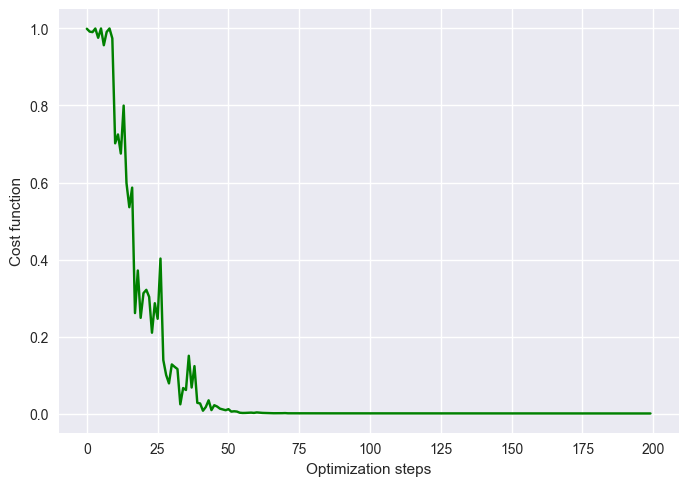

In [8]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")
vqlssvmVectors.plotCost()

In [9]:
print(vqlssvmVectors.predict(xTest))

[-0.156 +0.j -0.0625+0.j -0.2615+0.j  0.0475+0.j -0.1693+0.j -0.062 +0.j
 -0.226 +0.j -0.0847+0.j  0.0189+0.j -0.1576+0.j -0.0702+0.j -0.0601+0.j
 -0.0856+0.j -0.0289+0.j -0.1012+0.j -0.1447+0.j  0.0475+0.j -0.2098+0.j
 -0.1424+0.j -0.0967+0.j -0.1304+0.j -0.1197+0.j -0.0298+0.j -0.1193+0.j
 -0.1701+0.j  0.0446+0.j -0.2465+0.j  0.0012+0.j -0.0723+0.j -0.0989+0.j
 -0.0895+0.j -0.0802+0.j -0.0899+0.j -0.1194+0.j -0.0809+0.j -0.114 +0.j
 -0.038 +0.j -0.0432+0.j -0.1412+0.j -0.0772+0.j -0.1392+0.j -0.0953+0.j
 -0.1848+0.j -0.1365+0.j -0.1199+0.j -0.0949+0.j -0.1493+0.j -0.1408+0.j
 -0.14  +0.j -0.0872+0.j -0.1187+0.j -0.102 +0.j -0.0327+0.j -0.1956+0.j
 -0.0283+0.j -0.0938+0.j -0.1511+0.j -0.0734+0.j -0.0522+0.j -0.078 +0.j
 -0.1546+0.j -0.1467+0.j -0.1227+0.j -0.0016+0.j -0.1428+0.j -0.0994+0.j
 -0.0775+0.j -0.0512+0.j  0.0165+0.j -0.1436+0.j -0.0769+0.j -0.0282+0.j
 -0.1503+0.j -0.0827+0.j -0.0936+0.j  0.0193+0.j -0.1866+0.j -0.0994+0.j
 -0.0535+0.j -0.0734+0.j -0.1345+0.j -0.1818+0.j -0

In [10]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 0.42170818505338076


# VQLS-LSSVM quantum

Condition number of the matrix:  3560.5902226083717
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     113.2358  -6.1139  -5.0105  -1.8334  -2.8784  -0.3542  -2.5104]
 [  1.      -6.1139 115.0996  13.3334  14.0325  13.8337  10.0814   7.2092]
 [  1.      -5.0105  13.3334 112.918   12.5322  12.2647   8.6911   7.0377]
 [  1.      -1.8334  14.0325  12.5322 115.6912  15.0914  11.4784   7.9913]
 [  1.      -2.8784  13.8337  12.2647  15.0914 114.95    11.4352   8.0026]
 [  1.      -0.3542  10.0814   8.6911  11.4784  11.4352 110.8235   4.9831]
 [  1.      -2.5104   7.2092   7.0377   7.9913   8.0026   4.9831 108.3343]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(98.88154526145361+0j), (8.601965555219738+0j), 

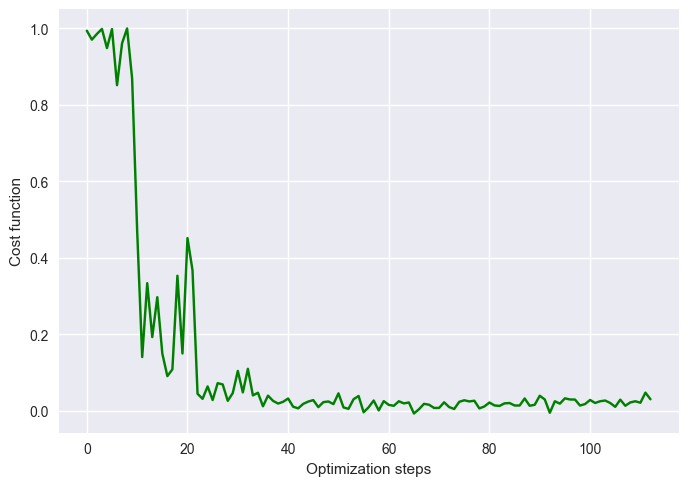

In [11]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvmQuantum.plotCost()

In [12]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [13]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [-0.2426+0.j -0.1373+0.j -0.2647+0.j  0.0152+0.j -0.2421+0.j -0.1382+0.j
 -0.2631+0.j -0.1701+0.j -0.0524+0.j -0.2197+0.j -0.1466+0.j -0.1437+0.j
 -0.1444+0.j -0.0998+0.j -0.1871+0.j -0.2297+0.j -0.0279+0.j -0.2373+0.j
 -0.1906+0.j -0.1936+0.j -0.1783+0.j -0.1665+0.j -0.1084+0.j -0.1952+0.j
 -0.2104+0.j  0.0217+0.j -0.2788+0.j -0.064 +0.j -0.1435+0.j -0.1772+0.j
 -0.135 +0.j -0.1617+0.j -0.1286+0.j -0.2032+0.j -0.1715+0.j -0.1917+0.j
 -0.1024+0.j -0.1222+0.j -0.2271+0.j -0.1301+0.j -0.2258+0.j -0.1865+0.j
 -0.253 +0.j -0.1923+0.j -0.1704+0.j -0.1779+0.j -0.2269+0.j -0.2187+0.j
 -0.2215+0.j -0.1288+0.j -0.1941+0.j -0.1692+0.j -0.1175+0.j -0.2566+0.j
 -0.109 +0.j -0.1407+0.j -0.1821+0.j -0.1555+0.j -0.1276+0.j -0.1573+0.j
 -0.2335+0.j -0.2061+0.j -0.2033+0.j -0.0667+0.j -0.2317+0.j -0.166 +0.j
 -0.1605+0.j -0.1238+0.j -0.048 +0.j -0.1877+0.j -0.1281+0.j -0.1039+0.j
 -0.2138+0.j -0.1457+0.j -0.1687+0.j -0.0543+0.j -0.2347+0.j -0.1742+0.j
 -0.1186+0.j -0.1077+0.j -0.1948+0.j 

# LSSVM (work in progresss)

In [14]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [7]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 0.9039145907473309
